# Ejercicio practico final Python
### El objetivo general es realizar un análisis exploratorio de datos sobre los elementos comunes de ambos datasets. Estos son los objetivos para realizar:

- Convertir los archivos “funds.csv” y “funding_rounds.csv” a Pandas dataframes.
- Buscar un elemento común de ambos dataframes y convertirlos en uno solo.
- Eliminar las columnas “id”, “source_url”, “source_description” y “updated_at”.
- Mostrar el número de nulos que tiene cada columna del dataframe y qué porcentaje supone dentro de cada columna el número de nulos.
- Modificar todos los valores de “raised_currency_dode” nulos a USD.
- Eliminar el resto de nulos del dataset.
- Mostrar el porcentaje de los diferentes valores de “raised_currency_code”.
- Crear un subconjunto sin el valor USD y visualizar un diagrama de barras.
- Crear un nuevo subconjunto filtrando del dataset todas las filas por debajo de 10 millones y visualizar el histograma.
- Con el conjunto del apartado anterior, investigar sobre la función “contains()” (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html) y filtrar el dataset por las fechas de creación de las startup en 2000.
- Sobre el conjunto filtrado por fecha, visualizar la cuantía obtenida explicada por el tipo de moneda.  

Convertir los archivos “funds.csv” y “funding_rounds.csv” a Pandas dataframes.

In [1]:
import pandas as pd

In [2]:
funds = pd.read_csv("funds.csv")
f_rounds = pd.read_csv("funding_rounds.csv")

In [3]:
# Mostrar las 5 primeras posiciones de los df
funds.head(3)

,id,fund_id,object_id,name,funded_at,raised_amount,raised_currency_code,source_url,source_description,created_at,updated_at
0,1,1,f:371,Second Fund,2008-12-16,300000000.0,USD,http://www.pehub.com/26194/dfj-dragon-raising-...,peHub,2008-12-17 03:07:16,2008-12-17 03:07:16
1,4,4,f:17,Sequoia Israel Fourth Fund,2008-12-17,200750000.0,USD,http://www.pehub.com/26725/sequoia-israel-rais...,Sequoia Israel Raises Fourth Fund,2008-12-18 22:04:42,2008-12-18 22:04:42
2,5,5,f:951,Tenth fund,2008-08-11,650000000.0,USD,http://venturebeat.com/2008/08/11/interwest-cl...,Venture Beat,2008-12-31 09:47:51,2008-12-31 09:47:51


In [4]:
f_rounds.head(3)

,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,...,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at
0,1,1,c:4,2006-12-01,series-b,b,8500000.0,8500000.0,USD,0.0,...,0.0,NaN,2,0,0,http://www.marketingvox.com/archives/2006/12/2...,NaN,initial-importer,2007-07-04 04:52:57,2008-02-27 23:14:29
1,2,2,c:5,2004-09-01,angel,angel,500000.0,500000.0,USD,0.0,...,0.0,USD,2,0,1,NaN,NaN,initial-importer,2007-05-27 06:08:18,2013-06-28 20:07:23
2,3,3,c:5,2005-05-01,series-a,a,12700000.0,12700000.0,USD,115000000.0,...,0.0,USD,3,0,0,http://www.techcrunch.com/2007/11/02/jim-breye...,Jim Breyer: Extra $500 Million Round For Faceb...,initial-importer,2007-05-27 06:09:10,2013-06-28 20:07:23


In [5]:
funds.columns

Index(['id', 'fund_id', 'object_id', 'name', 'funded_at', 'raised_amount',
       'raised_currency_code', 'source_url', 'source_description',
       'created_at', 'updated_at'],
      dtype='object')

In [6]:
funds.shape

(1564, 11)

In [7]:
f_rounds.columns

Index(['id', 'funding_round_id', 'object_id', 'funded_at',
       'funding_round_type', 'funding_round_code', 'raised_amount_usd',
       'raised_amount', 'raised_currency_code', 'pre_money_valuation_usd',
       'pre_money_valuation', 'pre_money_currency_code',
       'post_money_valuation_usd', 'post_money_valuation',
       'post_money_currency_code', 'participants', 'is_first_round',
       'is_last_round', 'source_url', 'source_description', 'created_by',
       'created_at', 'updated_at'],
      dtype='object')

In [8]:
f_rounds.shape

(52928, 23)

Buscar un elemento común de ambos dataframes y convertirlos en uno solo.

In [9]:
df = pd.concat([funds,f_rounds], ignore_index=True, join="inner")

Eliminar las columnas “id”, “source_url”, “source_description” y “updated_at”.

In [10]:
columnas_borrar = ["id", "source_url", "source_description", "updated_at"]
df = df.drop(columnas_borrar, axis=1)
df.head()

,object_id,funded_at,raised_amount,raised_currency_code,created_at
0,f:371,2008-12-16,300000000.0,USD,2008-12-17 03:07:16
1,f:17,2008-12-17,200750000.0,USD,2008-12-18 22:04:42
2,f:951,2008-08-11,650000000.0,USD,2008-12-31 09:47:51
3,f:192,NaN,625000000.0,USD,2009-01-01 18:13:44
4,f:519,2008-05-20,200000000.0,USD,2009-01-03 09:51:58


Mostrar el número de nulos que tiene cada columna del dataframe y qué porcentaje supone dentro de cada columna el número de nulos.

In [11]:
def nulos(dataframe):
    print("*CANTIDAD de datos nulos por columna en el dataframe")
    print(dataframe.isnull().sum())
    print("----------------------------------")
    print("*PORCENTAJE de datos nulos por columna en el dataframe")
    print(dataframe.isnull().sum()/len(dataframe)*100)

In [12]:
nulos(dataframe=df)

*CANTIDAD de datos nulos por columna en el dataframe
object_id                  0
funded_at                363
raised_amount              0
raised_currency_code    3066
created_at                 0
dtype: int64
----------------------------------
*PORCENTAJE de datos nulos por columna en el dataframe
object_id               0.000000
funded_at               0.666153
raised_amount           0.000000
raised_currency_code    5.626514
created_at              0.000000
dtype: float64


Modificar todos los valores de “raised_currency_code” nulos a USD.

In [13]:
df["raised_currency_code"] = df["raised_currency_code"].fillna("USD")

Eliminar el resto de nulos del dataset.

In [14]:
df = df.dropna()
nulos(dataframe=df)

*CANTIDAD de datos nulos por columna en el dataframe
object_id               0
funded_at               0
raised_amount           0
raised_currency_code    0
created_at              0
dtype: int64
----------------------------------
*PORCENTAJE de datos nulos por columna en el dataframe
object_id               0.0
funded_at               0.0
raised_amount           0.0
raised_currency_code    0.0
created_at              0.0
dtype: float64


Mostrar el porcentaje de los diferentes valores de “raised_currency_dode”.

In [15]:
df["raised_currency_code"].unique()

array(['USD', 'GBP', 'EUR', 'CAD', 'JPY', 'SEK', 'AUD', 'NIS'],
      dtype=object)

In [16]:
print((pd.crosstab(index=df["raised_currency_code"], columns="count"))/len(df) * 100)

col_0                     count
raised_currency_code           
AUD                    0.044339
CAD                    0.533910
EUR                    4.722053
GBP                    2.532838
JPY                    0.131168
NIS                    0.005542
SEK                    0.149643
USD                   91.880508


Crear un subconjunto sin el valor USD y visualizar un diagrama de barras.

In [17]:
no_usd = df[df["raised_currency_code"] != "USD"].copy()

In [18]:
from plotnine import *

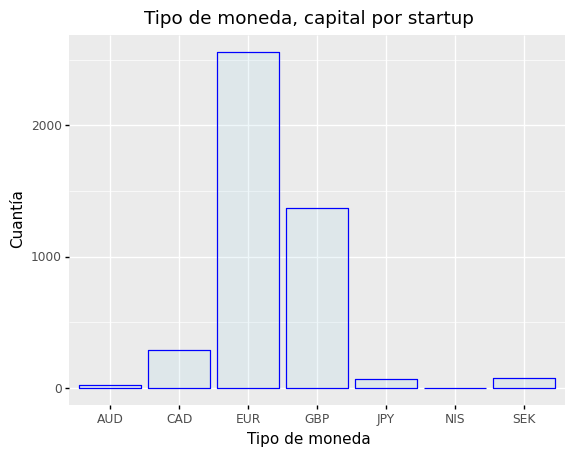

<ggplot: (146042985936)>

In [19]:
(
    ggplot(no_usd) +
     geom_bar(aes(x='raised_currency_code'), 
                    color = 'blue', 
                    fill = 'lightblue', 
                    alpha = 0.2, 
                    linetype='solid') +
     labs(title="Tipo de moneda, capital por startup",
            x="Tipo de moneda",
            y="Cuantía")
)

Crear un nuevo subconjunto filtrando del dataset todas las filas por debajo de 10 millones y visualizar el histograma.

In [20]:
less_tenm = df[df["raised_amount"] <= 10000000].copy()
less_tenm.describe()

,raised_amount
count,4.408700e+04
mean,2.193930e+06
std,2.717348e+06
min,0.000000e+00
25%,1.320000e+05
50%,1.000000e+06
75%,3.325248e+06
max,1.000000e+07


C:\Users\mario\anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 56'. Pick better value with 'binwidth'.


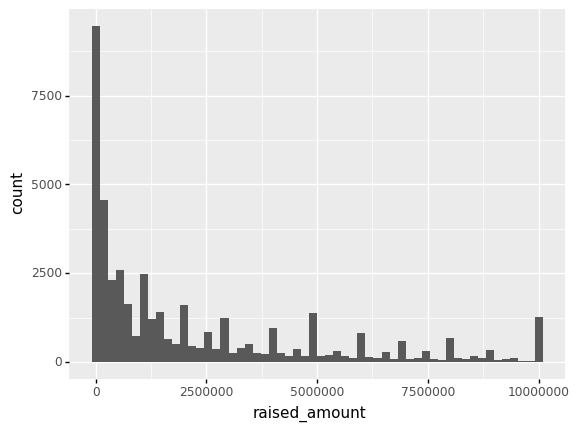

<ggplot: (146043312231)>

In [21]:
(
    ggplot(less_tenm) +
     geom_histogram(aes(x='raised_amount')) 

)

C:\Users\mario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='raised_amount', ylabel='Density'>

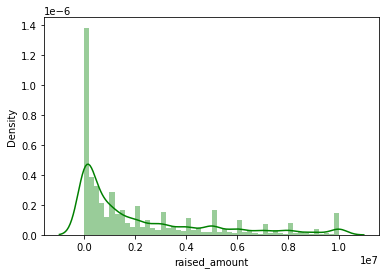

In [22]:
import seaborn as sns
sns.distplot(a=less_tenm["raised_amount"], color='green')

Con el conjunto del apartado anterior, investigar sobre la función “contains()” (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html) y filtrar el dataset por las fechas de creación de las startup en 2000.

In [23]:
less_tenm = less_tenm[less_tenm["funded_at"].str.contains("2000")].copy()
less_tenm

,object_id,funded_at,raised_amount,raised_currency_code,created_at
39,f:892,2000-01-01,0.0,USD,2009-02-18 17:56:00
389,f:1980,2000-10-23,0.0,USD,2011-03-26 22:43:28
533,f:30,2000-01-01,51.0,EUR,2011-10-28 11:45:45
1183,f:4546,2000-01-01,0.0,USD,2013-07-18 17:19:49
1732,c:253,2000-05-01,7700000.0,USD,2007-07-24 10:56:39
...,...,...,...,...,...
45600,c:45185,2000-12-01,2000000.0,GBP,2013-09-12 10:18:51
45687,c:201169,2000-12-20,4000000.0,USD,2013-09-13 10:00:52
47429,c:46416,2000-03-15,0.0,USD,2013-10-01 12:04:50
48812,c:76328,2000-01-01,5400000.0,USD,2013-10-16 21:17:39


Sobre el conjunto filtrado por fecha, visualizar la cuantía obtenida explicada por el tipo de moneda.  

C:\Users\mario\anaconda3\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\mario\anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 6'. Pick better value with 'binwidth'.


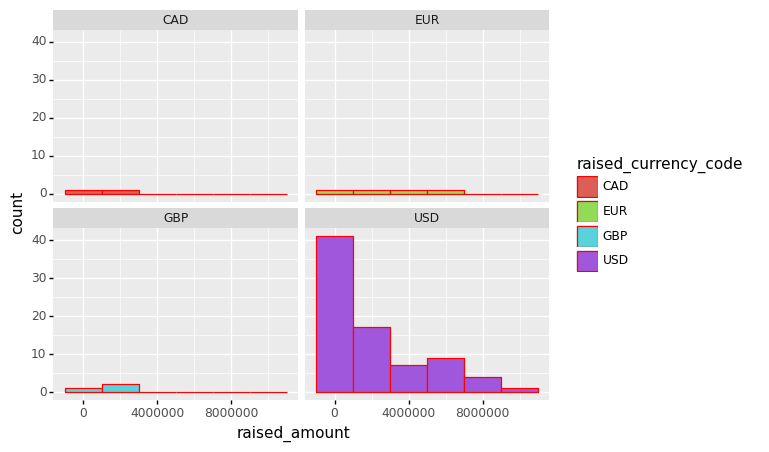

<ggplot: (146044392199)>

In [24]:
(ggplot(less_tenm) +
    geom_histogram(mapping=aes("raised_amount", fill="raised_currency_code"), color="red") +
    facet_wrap("raised_currency_code")
)